<a href="https://colab.research.google.com/github/conste11ations/ml3253-2021/blob/main/Week_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Assignment 3

## In this weeek you are building a classification model using credit card client dataset. Once you run below code, you can submit your response on the Quercus platform.

In [30]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Classification

<pre>
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 

X6 : the repayment status in September, 2005;
X7 : the repayment status in August, 2005; . . .;X11 : the repayment status in April, 2005. 

The measurement scale for the repayment status is:

-2: No consumption; 
-1: Paid in full;
 0: The use of revolving credit; 
 1: payment delay for one month; 
 2: payment delay for two months; . . .; 8 = payment delay for eight months; 
 9: payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). 
X12 : amount of bill statement in September, 2005; 
X13 : amount of bill statement in August, 2005; . . .; X17 : amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). 
X18 : amount paid in September, 2005; 
X19 : amount paid in August, 2005; . . .;X23 : amount paid in April, 2005.

Y: client's behavior; Y=0 then not default, Y=1 then default 
</pre>

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline (Pipeline is part of learning during assignment. There are tons of freely available contents you can use, including this [video](https://www.youtube.com/watch?v=Om_TFrFGotQ) and [this](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) one from SKLearn )
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B
- Study the ROC Curve, decide threshold
- Implement hyper parameter tuning for your models. If you need to read more about hyperparameter tuning, please read [this](https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624) blog. You also had the same think in week 1 notebook (you can refer to the week 1 notebook to find out the code in action).
- Use 2 classifiers ( we will discuss random forest later in the course).
    - Random Forest (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
        - use hyperparameter tuning and try to tun only n_estimators with these values {3, 4, 6, 7, 10, 20, 50, 100} 
        
    - KNN Classfier (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
        - use hyperparameter tuning and try to tun only  n_neighbors with values {3, 4, 5, 7, 10, 20, 50} 
    - Which one performs better in the cross validation?
    

- Use Cross-validation with 4-folds and compare results.

Notes:
  - Make your code modular, the second part of the assignmet you will have to repeat. 
  - Provide inline comment and text for your code  readability 

In [31]:
### Your code here

## Feel free to use multiple cells

df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", skiprows= 1, header = 0)

In [32]:
### RUN
#df.loc[df.index[3330],"BILL_AMT6"]
# why not
df.loc[3330, "BILL_AMT6"]
### Your code here

df_explore = df.copy()
df = df.rename(columns={"default payment next month": "default"})
df_explore = df_explore.rename(columns={"default payment next month": "default"})


In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
pd.options.display.max_columns = None
df_explore.sample(10, random_state=123)

In [ ]:
# count nulls -> no null values
count_nulls = [ (x, df_explore[x].isnull().sum()) for x in df_explore.columns]
count_nulls

In [ ]:
# Class distribution

defaults_distr = pd.DataFrame(df_explore['default'].value_counts().astype(int))
defaults_distr

In [ ]:
print('Total number of clients: ' + str(int(defaults_distr['default'][0]+defaults_distr['default'][1]))) 
print('Defaults: ' + str(int(defaults_distr['default'][1])) + ' (' +
      str((100.0*defaults_distr['default'][1])/(defaults_distr['default'][0]+defaults_distr['default'][1])) + '%)')

In [33]:
### RUN
dependant_var = ["default"]

categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE']

continuous_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                   'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
discrete_vars = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [ ]:
pd.options.display.max_columns = None
df_explore.loc[:, dependant_var + discrete_vars + continuous_vars].describe()

In [ ]:
df_explore.loc[:, discrete_vars].hist(bins=10, figsize=(15,10))
plt.show();

In [ ]:
df_explore.loc[:, continuous_vars].hist(bins=50, figsize=(20,15))
plt.show();

In [ ]:
df_explore.loc[:, categorical_vars].hist(bins=10, figsize=(15,10))
plt.show();

In [ ]:
# more imports
import seaborn as sns
#sns.pairplot(data=df_explore.loc[:, dependant_var + continuous_vars]);


In [ ]:
# Df to draw charts for clients that default, default=1
df_default = df_explore.where(df_explore['default']==1)
df_ok = df_explore.where(df_explore['default']==0)
# Plot the density - all cases (green), payed (blue) and default (red)
for i, var in enumerate(discrete_vars):
    plt.figure(i)
    plt.title(var)

    plt.hist([df_explore.loc[:, var], df_ok.loc[:, var], df_default.loc[:, var]], density=True, color=['g','b','r'], alpha=0.8);

In [ ]:
# continuous vars
for i, var in enumerate(continuous_vars):
    plt.figure(i)
    plt.title(var)

    plt.hist([df_explore.loc[:, var], df_ok.loc[:, var], df_default.loc[:, var]], density=True, color=['g','b','r'], alpha=0.8);

In [ ]:
# category variables
for i, var in enumerate(categorical_vars):
    plt.figure(i)
    plt.title(var)

    plt.hist([df_explore.loc[:, var], df_ok.loc[:, var], df_default.loc[:, var]], density=True, color=['g','b','r'], alpha=0.8);

In [34]:
### RUN
import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))
pd.options.display.max_columns = None

In [35]:
# Categorical - one hot encode
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_vars)]

In [36]:
# Numerical - scale
num_scl_step = ('scl', MinMaxScaler())
num_steps = [num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, continuous_vars + discrete_vars)]

In [37]:

ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_vars + continuous_vars  + discrete_vars])
X = ct.transform(df[categorical_vars + continuous_vars + discrete_vars])
y = df[['default']].values

In [26]:
df_describe = pd.DataFrame(X)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.396267,0.603733,0.000467,0.352833,0.467667,0.163900,0.004100,0.009333,0.001700,0.001800,0.455300,0.532133,0.010767,0.159075,0.249750,0.191846,0.112893,0.112157,0.200891,0.120620,0.290851,0.006483,0.003516,0.005832,0.007771,0.011252,0.009865,0.19833,0.186623,0.183380,0.177933,0.173380,0.170890
std,0.489129,0.489129,0.021598,0.477859,0.498962,0.370191,0.063901,0.096159,0.041197,0.042389,0.498006,0.498975,0.103204,0.131058,0.158929,0.065159,0.067546,0.038076,0.060601,0.060284,0.045766,0.018961,0.013680,0.019650,0.025227,0.035820,0.033627,0.11238,0.119719,0.119687,0.116914,0.113319,0.114999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040404,0.120690,0.149668,0.069053,0.087808,0.162330,0.082396,0.261944,0.001145,0.000495,0.000435,0.000477,0.000592,0.000223,0.10000,0.100000,0.100000,0.100000,0.100000,0.100000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.131313,0.224138,0.166324,0.086340,0.097374,0.178084,0.098600,0.274097,0.002404,0.001193,0.002009,0.002415,0.003517,0.002837,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.232323,0.344828,0.205887,0.126964,0.119378,0.211482,0.130415,0.298787,0.005731,0.002969,0.005028,0.006463,0.009452,0.007566,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# CHANGE
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18000, 33) (12000, 33) (18000, 1) (12000, 1)
CPU times: user 139 ms, sys: 1.01 ms, total: 140 ms
Wall time: 138 ms


## **The model**
It will be a supervised ML problem, with dependant variable "default".
The response variable is binary (1 or 0), the type of the model will be classification.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def display_results(model, X, y):
    print("RMSE:", rmse(model.predict(X), y))
    print("Predicted 1-5:", model.predict(X_test[0:5]))
    print("Actual 1-5:", y_test[0:5, 0])

## Random Forrest Classifier

use hyperparameter tuning and try to tun only n_estimators with these values {3, 4, 6, 7, 10, 20, 50, 100}

In [40]:
%%time
for n_est in [3, 4, 6, 7, 10, 20, 50, 100]:
    rf = RandomForestClassifier(n_estimators=n_est, random_state=123)
    rf.fit(X_train, np.ravel(y_train))
    print('----- Number of estimators:' + str(n_est) + '-------------')
    display_results(rf, X, y)

----- Number of estimators:3-------------
RMSE: 0.5750762036460907
Predicted 1-5: [0 0 0 0 0]
Actual 1-5: [1 0 0 0 0]
----- Number of estimators:4-------------
RMSE: 0.5512640746502533
Predicted 1-5: [0 0 0 0 0]
Actual 1-5: [1 0 0 0 0]
----- Number of estimators:6-------------
RMSE: 0.5554793725543131
Predicted 1-5: [0 0 0 0 0]
Actual 1-5: [1 0 0 0 0]
----- Number of estimators:7-------------
RMSE: 0.568640765334319
Predicted 1-5: [0 0 0 0 0]
Actual 1-5: [1 0 0 0 0]
----- Number of estimators:10-------------
RMSE: 0.5606251986250113
Predicted 1-5: [0 0 0 0 0]
Actual 1-5: [1 0 0 0 0]
----- Number of estimators:20-------------
RMSE: 0.5648858055689958
Predicted 1-5: [0 0 0 0 0]
Actual 1-5: [1 0 0 0 0]
----- Number of estimators:50-------------
RMSE: 0.5676920761586631
Predicted 1-5: [0 0 0 0 0]
Actual 1-5: [1 0 0 0 0]
----- Number of estimators:100-------------
RMSE: 0.5679866665101685
Predicted 1-5: [0 0 0 0 0]
Actual 1-5: [1 0 0 0 0]
CPU times: user 38.5 s, sys: 186 ms, total: 38.7 s
W

## KNeighbors Classifier

use hyperparameter tuning and try to tun only n_neighbors with values {3, 4, 5, 7, 10, 20, 50}

In [13]:
%%time
for n_nei in [3, 4, 5, 7, 10, 20, 50]:
    knn = KNeighborsClassifier(n_neighbors=n_nei)
    knn.fit(X_train, np.ravel(y_train))
    print('----- Number of neighbors:' + str(n_nei) + '-------------')
    display_results(knn, X, y)

----- Number of neighbors:3-------------
RMSE: 0.5576000717360069
Predicted 1-5: [0 1 1 0 0]
Actual 1-5: [0 1 1 0 0]
----- Number of neighbors:4-------------
RMSE: 0.5233480677331293
Predicted 1-5: [0 0 1 0 0]
Actual 1-5: [0 1 1 0 0]
----- Number of neighbors:5-------------
RMSE: 0.5457746787823708
Predicted 1-5: [0 0 1 0 0]
Actual 1-5: [0 1 1 0 0]
----- Number of neighbors:7-------------
RMSE: 0.5401262815305324
Predicted 1-5: [1 0 1 0 0]
Actual 1-5: [0 1 1 0 0]
----- Number of neighbors:10-------------
RMSE: 0.5249083983579104
Predicted 1-5: [1 0 1 0 0]
Actual 1-5: [0 1 1 0 0]
----- Number of neighbors:20-------------
RMSE: 0.5241465443938365
Predicted 1-5: [1 0 1 0 0]
Actual 1-5: [0 1 1 0 0]
----- Number of neighbors:50-------------
RMSE: 0.5197844425015687
Predicted 1-5: [0 0 1 0 0]
Actual 1-5: [0 1 1 0 0]
CPU times: user 1min 31s, sys: 159 ms, total: 1min 31s
Wall time: 1min 30s


In [41]:
# Later will find better models. Here we are interested of variable's importance
# Best RMSE: a) Random forest: n_estimators=4; b) KNeighbors: n_neighbours=10
rf_best = RandomForestClassifier(n_estimators=4, random_state=123)
rf_best.fit(X_train, np.ravel(y_train))

knn_best = KNeighborsClassifier(n_neighbors=5)
knn_best.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", np.sqrt(-scores))
    print("Mean:", np.sqrt(-scores).mean())
    print("Standard deviation:", np.sqrt(-scores).std())

In [53]:
%%time

for n_est in [3, 4, 6, 7, 10, 20, 50, 100]:
    print('------------ Random Forest. n_estimators = ', str(n_est), ' ------------')
    rf = RandomForestClassifier(n_estimators=n_est, random_state=123)
    scores = cross_val_score(rf, X, np.ravel(y), cv=3, scoring='neg_mean_squared_error')
    np.sqrt(-scores)
    display_scores(scores)

------------ Random Forest. n_estimators =  3  ------------
Scores: [0.48723711 0.48124838 0.47833043]
Mean: 0.48227197164929586
Standard deviation: 0.0037074737356711423
------------ Random Forest. n_estimators =  4  ------------
Scores: [0.4594562  0.45442271 0.45199558]
Mean: 0.4552914954020191
Standard deviation: 0.0031071232021384772
------------ Random Forest. n_estimators =  6  ------------
Scores: [0.45475268 0.4456456  0.44395946]
Mean: 0.44811924558256305
Standard deviation: 0.004740788104094126
------------ Random Forest. n_estimators =  7  ------------
Scores: [0.46195238 0.44866469 0.44519659]
Mean: 0.4519378832575254
Standard deviation: 0.0072214733058643815
------------ Random Forest. n_estimators =  10  ------------
Scores: [0.44899889 0.43737855 0.43783559]
Mean: 0.44140434218841545
Standard deviation: 0.00537339407440763
------------ Random Forest. n_estimators =  20  ------------
Scores: [0.44328321 0.42988371 0.43335897]
Mean: 0.43550862799684426
Standard deviation:

# Hyperparameter search

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
%%time
# we create a dictionary of lists, each key is a parameter name
# and the list is the possible values it can take

param_grid = {
    'n_estimators':[3, 4, 6, 7, 10, 20, 50, 100]
}

clf = RandomForestClassifier(n_estimators =  50, random_state = 123)
# we pass the model, our parameter grid, and cross-validation parameters to the class
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5)
# last, we fit our data. This will take a while...
grid_search.fit(X=X, y=np.ravel(y))

CPU times: user 1min 13s, sys: 146 ms, total: 1min 13s
Wall time: 1min 13s


In [44]:
print(grid_search.best_params_)
print("\n", grid_search.best_estimator_)

{'n_estimators': 100}

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


In [45]:
cv_scores= grid_search.cv_results_
cv_scores = grid_search.cv_results_
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores['params']):
    if np.sqrt(-mean_score) < 0.43027 :
        print(np.sqrt(-mean_score), params)

In [46]:
final_model_rf = grid_search.best_estimator_
display_results(final_model_rf, X_test, y_test)
print(f'Model Accuracy: {final_model_rf.score(X_test, y_test)}')

RMSE: 0.5867466091366301
Predicted 1-5: [1 0 0 0 0]
Actual 1-5: [1 0 0 0 0]
Model Accuracy: 0.99925


In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, confusion_matrix

 Random forest: ROC AUC=0.764


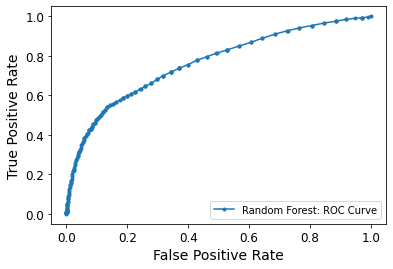

In [48]:
# roc curve and auc

# fit a model
model = final_model_rf
model.fit(X_train, np.ravel(y_train))

# predict probabilities
rf_probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores

rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print(' Random forest: ROC AUC=%.3f' % (rf_auc))

# calculate roc curve
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_probs)
#print('Thresholds', thresholds)

# plot the roc curve for the model
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest: ROC Curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend(loc=4)
# show the plot
pyplot.show()

In [ ]:
max(df.loc[:,"PAY_0"])

In [ ]:
# Cross-validation with 5-folds
#Did you get different results compared to the 4-fold case?

#### Conclusions?

Explain your results and choices

Q2. (Optional) Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion. 

### Conclusions
